# Final Project - William Shakespeare 
### by Juan Montoya 

In [16]:
# import dependencies here
import pandas as pd 
import requests
import json
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
import nltk

## Introduction

My inspiration for working with William Shakespeare is mainly my early education. To this day, I remember elementary, middle school, and high school English classes being riddled with Shakespeare's work making him the most hated and loved writer in educational history. Mainly, this is because at a young age, Shakespeare is polarizing, and it is not until later, Junior and Senior year of high school where one might begin to gain a different level of appreciation for his work. In fact, this is what happened to me. I did not begin to start enjoying Shakespeare until high school where his plays were less boring and difficult and more dynamic and emotional. In fact, in doing some research regarding Shakespeare's popularity across the world one begins to get a sense that his immortality is attributed to his works being diverse and dynamic which is why people are able to relate to his work. Thus, it is Shakespeare’s relevance to everyday life combined with the drama loving phycology of humans that attracts so many people to his work and thus completes the full circle. Hence, it is this full circle that I am so intrigued with. Are William Shakespeare’s works really so diverse and overarching that allows people from different tastes to be more easily engaged? That is the question I have been wondering since my early childhood and something that we can test through comparing his different works through two main literary computational methods by measuring stylometry. One is Tf-IDF which gives one the comparative understanding Shakespeare’s works by focusing on the term frequency adjusted for inverse document frequency. The second is Principle Component Analysis which reduced the works components (i.e. 400 most common words) into two dimensions so that it can be easily graphed on the cartesian plane. Mainly, I believe that Shakespeare has some of the most diverse plays making him the great he is now.

In [17]:
# Get metadata for William Shakespeare
response = requests.get('http://corpus-db.org/api/author/Shakespeare,%20William')

In [18]:
parsedResponse = json.loads(response.text)

In [19]:
# Returns title of all works by William Shakespeare 
shakespeareWorksTitles = [item['title'] for item in parsedResponse]
print(len(shakespeareWorksTitles))

306


There are a total of 306 works by William Shakespeare.

In [20]:
# Top ten most popular Shakespeare works
hamlet = parsedResponse[107]
macbeth = parsedResponse[75]
juliusCaesar = parsedResponse[64]
theTempest = parsedResponse[38]
firstPartHenryFourth = parsedResponse[18]
kingLear = parsedResponse[31]
romeoAndJuliet = parsedResponse[55]
kingJohn = parsedResponse[13]
muchAdoAboutNothing = parsedResponse[21]
theWintersTale = parsedResponse[37]

In [21]:
# Turning the top ten works by Shakespeare into a list
shakespeareCorpusMeta = [hamlet, macbeth, juliusCaesar, theTempest, 
                         firstPartHenryFourth, kingLear, romeoAndJuliet, 
                         kingJohn, muchAdoAboutNothing, theWintersTale
                         ]

In [22]:
# Retrieving all the Id's for the ten works
shakespeareCorpusIds = [item['id'] for item in shakespeareCorpusMeta]
shakespeareCorpusIds

['1787.0',
 '1533.0',
 '1522.0',
 '1135.0',
 '1115.0',
 '1128.0',
 '1513.0',
 '1110.0',
 '1118.0',
 '1134.0']

In [23]:
def getFullText(bookId): 
    url = f'http://corpus-db.org/api/id/{bookId}/fulltext'
    response = requests.get(url)
    if response.ok: 
        bookText = json.loads(response.text)
        return bookText[0]['text']
    else:
        print('ERROR')

shakespeareTexts are the texts, from parsedResponse, with ten texts which are one for eahc of the top ten selected.  

In [24]:
shakespeareTexts = []
for bookId in shakespeareCorpusIds:
    shakespeareTexts.append(getFullText(bookId))

shakespeareTitles are the top ten Shakespeare works that I have selected. 

In [25]:
shakespeareTitles = [book['title'] for book in shakespeareCorpusMeta]
shakespeareTitles

['Hamlet',
 'Macbeth',
 'Julius Caesar',
 'The Tempest',
 'The First Part of King Henry the Fourth',
 'The Tragedy of King Lear',
 'Romeo and Juliet',
 'King John',
 'Much Ado about Nothing',
 "The Winter's Tale"]

In [26]:
# Joining the ten Titles with the ten texts for those titles 
shakespeareTitlesAndTexts = list(zip(shakespeareTitles, shakespeareTexts))

### Tf-IDF

In [27]:
#Tf-IDF
tfidfVectorizer = TfidfVectorizer(min_df=1.0, max_features=400, use_idf=False)

In [28]:
shakespeareFreq = tfidfVectorizer.fit_transform(shakespeareTexts).todense()

In [29]:
shakespeareWordNames = tfidfVectorizer.get_feature_names()

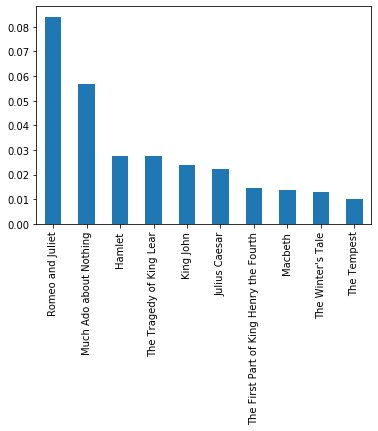

In [31]:
shakespeareDfLove = pd.DataFrame(shakespeareFreq, columns=shakespeareWordNames, index=shakespeareTitles)
pd.Series(shakespeareDfLove['love']).sort_values(ascending=False).plot(kind='bar')

#### Tf-IDF Conclusions for Love

I decided to test for the presence of 'love' across his ten most popular works and of course 'love' appears the most in *Romeo and Juliet* which makes sense since *Romeo and Juliet* is all about romance (and tragedy), but mainly romance. Whereas, 'love' appears the least in *The Tempest* since *The Tempest* is mainly about betrayal, murder, disasters, and revenge with little romance. Furthermore, I plotted the chart in descending order because it is easier to visualize the presence of 'love' across his ten most popular works. More specifically, it is easier to visualize how some of his works revolve around ‘love’ and how some of his works do not, meaning that there’s some other motif/theme that is more poplar which contributes the distinction among his works.

#### Tf-IDF Conclusions for Cry

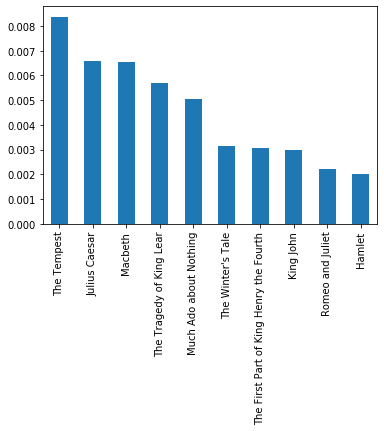

In [33]:
shakespeareDfCry = pd.DataFrame(shakespeareFreq, columns=shakespeareWordNames, index=shakespeareTitles)
pd.Series(shakespeareDfCry['cry']).sort_values(ascending=False).plot(kind='bar')

I decided to test 'cry' as the second word for Tf-IDF because its result looked like a normal distribution, which shows the even variety in Shakespeare’s works. For example, *The Tempest* and *Julius Caesar* have the most instances of 'cry' which makes sense because both works revolve around tears and emotional pain through revenge, backstabbing’s, and incestuous desire. Furthermore, in the case of *The Tempest*, noises are a big part of the stories development which adds to the value derived from the word 'cry' since 'cry' is both an emotion, sound, and appearance. I too, decided to plot this graph in descending order to better visualize the distribution of ‘cry’ among his top ten most popular works.

### PCA: Principal Component Analysis
Collapses 400 dimensions (most frequent words) to two dimensions, and tries to retain that information (eigenvectors and eigenvalues).

In [34]:
pca = PCA(n_components=2)

In [35]:
shakespeareReduced = pca.fit_transform(shakespeareFreq)

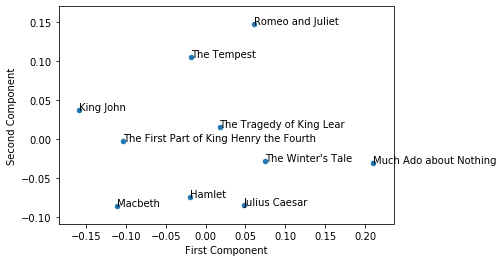

In [36]:
df = pd.DataFrame(shakespeareReduced, columns=['First Component', 'Second Component'], index=shakespeareTitles)
ax = df.plot(kind='scatter', x='First Component', y='Second Component')
for title, points in df.iterrows():
    ax.annotate(title, points)

#### PCA Conclusions

The results from the Principle Component Analysis are also extremely interesting for my analysis. Here, we see a circle being formed with all of the texts which further signals the diversity within Shakespeare's work. Overall, the stylometry of all of these texts is displayed though the circle being formed further signaling the diversity of his texts. Furthermore, given that Stylometry is commonly used for authorship detection, these findings are great because I was essentially arguing that his works are so diverse that it is hard to group them in one small clump and in fact his works are not clumped in one section, but rather in a circle. This circle further indicates the variety in stylometry among Shakespeare’s works.

#### Conclusion

Overall, Tf-IDF and PCA provided useful information which coincidentally supported my hypothesis. The notion that Shakespeare’s popularity can be directly correlated to the diversity of his works. As in lecture, it is likely for a work of a given author to congregate along a certain clump as it did with the works of Collins and Dickens. However, the distinction was *No Thoroughfare* where principle component analysis distinguished *No Thoroughfare * to be in between Wilkie Collins and Charles Dickens signifying the distinction in authorship between their works. Thus, given this relationship, Shakespeare’s top ten works formed, more or less, a circle in the principle component analysis symbolizing the diversity among his works.